In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
import tensorflow as tf
import keras

In [2]:
from keras.datasets import cifar10  
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visualize of images

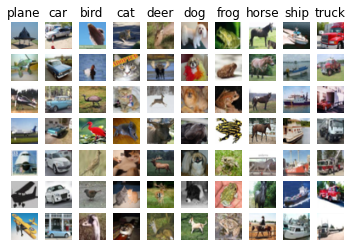

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Preprocessing

In [4]:
num_training = 5000
mask = list(range(num_training))
x_train = x_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_test = x_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print(x_train.shape, x_test.shape)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x=np.concatenate((x_train,x_test))
y=np.concatenate((y_train,y_test))

print(x.shape,y.shape)


(5000, 3072) (500, 3072)
(5500, 3072) (5500, 1)


# Normalisation

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

# ANN--Model

# Adam

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'selu')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = tf.keras.optimizers.Adam(
learning_rate=0.00001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
Bahubali=model.fit(x_train, y_train, epochs =50,validation_split = 0.2,batch_size=100)

Epoch 1/50
40/40 [==============================] - 2s 32ms/step - loss: 2.3761 - accuracy: 0.1044 - val_loss: 2.2650 - val_accuracy: 0.1570
Epoch 2/50
40/40 [==============================] - 0s 7ms/step - loss: 2.2321 - accuracy: 0.1798 - val_loss: 2.1897 - val_accuracy: 0.2170
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 2.1603 - accuracy: 0.2171 - val_loss: 2.1440 - val_accuracy: 0.2300
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 2.1140 - accuracy: 0.2472 - val_loss: 2.1067 - val_accuracy: 0.2510
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 2.0736 - accuracy: 0.2704 - val_loss: 2.0730 - val_accuracy: 0.2520
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 2.0444 - accuracy: 0.2787 - val_loss: 2.0494 - val_accuracy: 0.2700
Epoch 7/50
40/40 [==============================] - 0s 7ms/step - loss: 2.0125 - accuracy: 0.2886 - val_loss: 2.0225 - val_accuracy: 0.2830
Epoch 8/50
40/40 [=

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.7971 - accuracy: 0.3660


In [8]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.6082 - accuracy: 0.4398


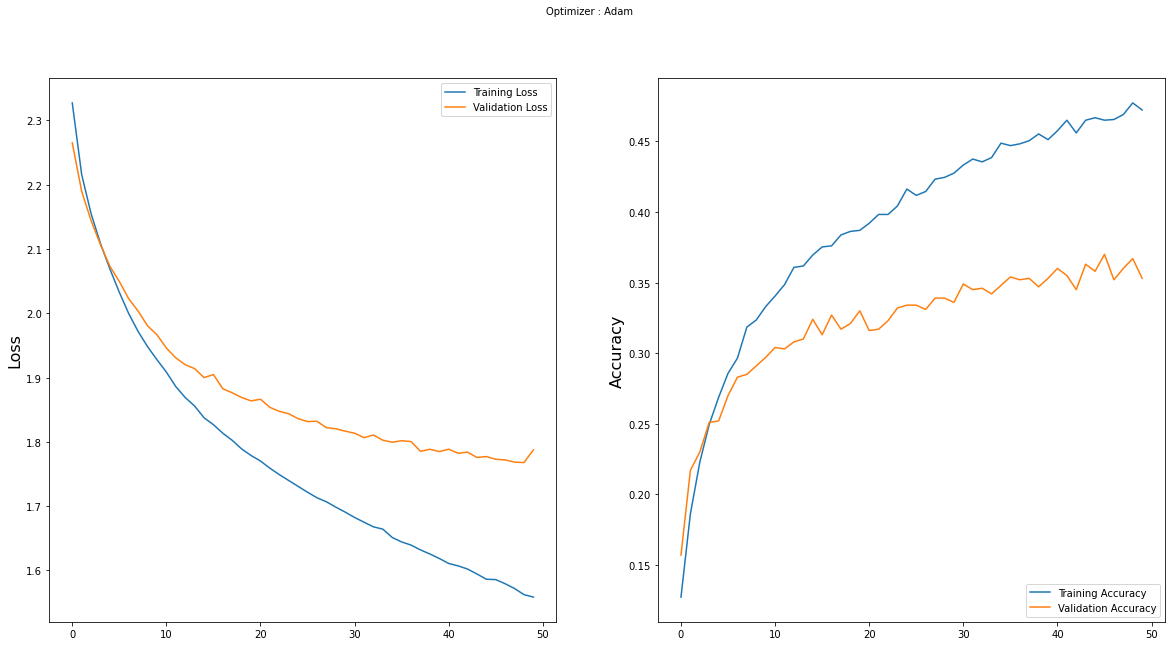

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(Bahubali.history['loss'], label='Training Loss')
plt.plot(Bahubali.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(Bahubali.history['accuracy'], label='Training Accuracy')
plt.plot(Bahubali.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# SGD

Stochastic gradient descent optimizer.

Includes support for momentum, learning rate decay, and Nesterov momentum.

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'softplus'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'selu')) #----- hidden layer
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
bahubali=model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 10ms/step - loss: 2.4927 - accuracy: 0.1226 - val_loss: 2.2301 - val_accuracy: 0.1900
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 2.2549 - accuracy: 0.1612 - val_loss: 2.1621 - val_accuracy: 0.2427
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 2.1655 - accuracy: 0.2119 - val_loss: 2.1015 - val_accuracy: 0.2400
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 2.1106 - accuracy: 0.2315 - val_loss: 2.0627 - val_accuracy: 0.2700
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 2.0490 - accuracy: 0.2526 - val_loss: 2.0336 - val_accuracy: 0.2660
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 2.0115 - accuracy: 0.2700 - val_loss: 2.0310 - val_accuracy: 0.2573
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 2.0156 - accuracy: 0.2752 - val_loss: 1.9687 - val_accuracy: 0.2960
Epoch 8/50
35/35 [=

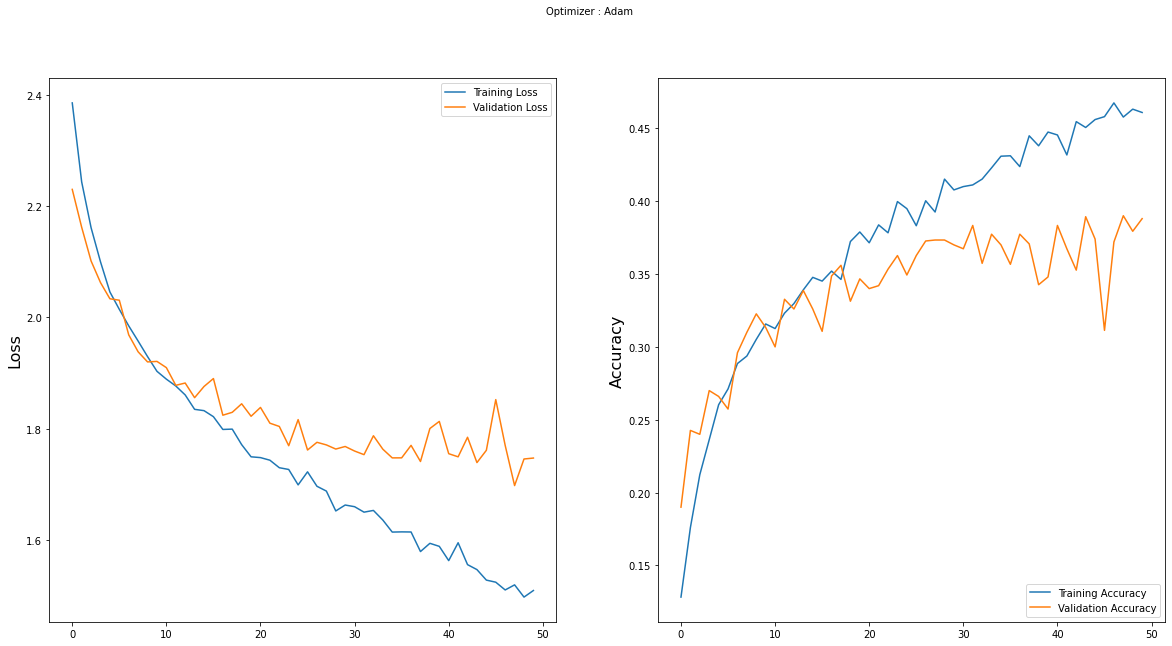

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(bahubali.history['loss'], label='Training Loss')
plt.plot(bahubali.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(bahubali.history['accuracy'], label='Training Accuracy')
plt.plot(bahubali.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.8094 - accuracy: 0.3560


In [13]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.5288 - accuracy: 0.4666


# Adagrad

It is recommended to leave the parameters of this optimizer at their default values

Adagrad >>with LR=0.01

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = tf.keras.optimizers.Adagrad(
learning_rate=0.01, initial_accumulator_value=0.1, epsilon=1e-07,), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.3533 - accuracy: 0.1413 - val_loss: 2.1583 - val_accuracy: 0.1813
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1074 - accuracy: 0.2336 - val_loss: 2.0219 - val_accuracy: 0.2580
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9975 - accuracy: 0.2721 - val_loss: 2.0102 - val_accuracy: 0.2600
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9791 - accuracy: 0.2779 - val_loss: 1.9279 - val_accuracy: 0.2913
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9224 - accuracy: 0.3102 - val_loss: 1.9767 - val_accuracy: 0.2907
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8874 - accuracy: 0.3115 - val_loss: 1.8985 - val_accuracy: 0.3087
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8533 - accuracy: 0.3385 - val_loss: 1.9199 - val_accuracy: 0.3153
Epoch 8/50
35/35 [=

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.0387 - accuracy: 0.3300


In [16]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.5849 - accuracy: 0.4722


Adagrad >>with LR=0.001

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = tf.keras.optimizers.Adagrad(
learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.5556 - accuracy: 0.1101 - val_loss: 2.3276 - val_accuracy: 0.1313
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3155 - accuracy: 0.1427 - val_loss: 2.2863 - val_accuracy: 0.1400
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2846 - accuracy: 0.1464 - val_loss: 2.2586 - val_accuracy: 0.1587
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2451 - accuracy: 0.1798 - val_loss: 2.2354 - val_accuracy: 0.1647
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2177 - accuracy: 0.1956 - val_loss: 2.2085 - val_accuracy: 0.1927
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2007 - accuracy: 0.2111 - val_loss: 2.1853 - val_accuracy: 0.2193
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1731 - accuracy: 0.2177 - val_loss: 2.1626 - val_accuracy: 0.2220
Epoch 8/50
35/35 [=

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.8783 - accuracy: 0.3380


In [19]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.7524 - accuracy: 0.3942


Adagrad >>with LR=0.005

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = tf.keras.optimizers.Adagrad(
learning_rate=0.005, initial_accumulator_value=0.1, epsilon=1e-07,), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 13ms/step - loss: 2.2684 - accuracy: 0.1554 - val_loss: 2.1520 - val_accuracy: 0.2027
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 2.0813 - accuracy: 0.2246 - val_loss: 2.0766 - val_accuracy: 0.2327
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 2.0317 - accuracy: 0.2530 - val_loss: 2.0059 - val_accuracy: 0.2773
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 1.9696 - accuracy: 0.2881 - val_loss: 1.9752 - val_accuracy: 0.2893
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 1.9403 - accuracy: 0.2951 - val_loss: 1.9345 - val_accuracy: 0.2880
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 1.9179 - accuracy: 0.2925 - val_loss: 1.9705 - val_accuracy: 0.2993
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 1.8647 - accuracy: 0.3301 - val_loss: 1.8905 - val_accuracy: 0.3133
Epoch 8/50
35/35 [=

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.7395 - accuracy: 0.3560


In [22]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.3862 - accuracy: 0.5182


Adagrad >>with LR=0.05

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = tf.keras.optimizers.Adagrad(
learning_rate=0.05, initial_accumulator_value=0.1, epsilon=1e-07,), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 3.0453 - accuracy: 0.1135 - val_loss: 2.2714 - val_accuracy: 0.1260
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2215 - accuracy: 0.1561 - val_loss: 2.1128 - val_accuracy: 0.2147
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1285 - accuracy: 0.1968 - val_loss: 2.0684 - val_accuracy: 0.2493
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0705 - accuracy: 0.2324 - val_loss: 2.0545 - val_accuracy: 0.2413
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0539 - accuracy: 0.2294 - val_loss: 2.0239 - val_accuracy: 0.2240
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0251 - accuracy: 0.2600 - val_loss: 1.9836 - val_accuracy: 0.2693
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9881 - accuracy: 0.2717 - val_loss: 1.9428 - val_accuracy: 0.2753
Epoch 8/50
35/35 [=

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.9855 - accuracy: 0.3460


In [25]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.4234 - accuracy: 0.5084


# Momentum Based Stochastic Gradient Descent

In [26]:
import keras.utils
from keras import utils as np_utils
from tensorflow.keras import optimizers

MB-SGD >>with LR=0.01

In [27]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 17ms/step - loss: 2.3385 - accuracy: 0.1283 - val_loss: 2.0860 - val_accuracy: 0.2247
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0388 - accuracy: 0.2471 - val_loss: 2.0272 - val_accuracy: 0.2620
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9850 - accuracy: 0.2726 - val_loss: 1.9136 - val_accuracy: 0.3087
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8538 - accuracy: 0.3304 - val_loss: 1.8507 - val_accuracy: 0.3267
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8001 - accuracy: 0.3563 - val_loss: 1.8427 - val_accuracy: 0.3380
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7691 - accuracy: 0.3560 - val_loss: 1.8163 - val_accuracy: 0.3527
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7261 - accuracy: 0.3838 - val_loss: 1.8242 - val_accuracy: 0.3347
Epoch 8/50
35/35 [=

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.1121 - accuracy: 0.3900


In [29]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.1941 - accuracy: 0.6336


MB-SGD >>with LR=0.001

In [30]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.4423 - accuracy: 0.1085 - val_loss: 2.2381 - val_accuracy: 0.1693
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2151 - accuracy: 0.1877 - val_loss: 2.1612 - val_accuracy: 0.1960
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1188 - accuracy: 0.2282 - val_loss: 2.0957 - val_accuracy: 0.2367
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0377 - accuracy: 0.2538 - val_loss: 2.0220 - val_accuracy: 0.2613
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9838 - accuracy: 0.2816 - val_loss: 1.9911 - val_accuracy: 0.2720
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9314 - accuracy: 0.2960 - val_loss: 1.9368 - val_accuracy: 0.2873
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8723 - accuracy: 0.3336 - val_loss: 1.8912 - val_accuracy: 0.3127
Epoch 8/50
35/35 [=

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.7290 - accuracy: 0.3960


In [32]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.2889 - accuracy: 0.5620


MB-SGD >>with LR=0.05

In [33]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=False)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.4011 - accuracy: 0.1214 - val_loss: 2.1656 - val_accuracy: 0.1547
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1466 - accuracy: 0.1649 - val_loss: 2.0684 - val_accuracy: 0.2107
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0172 - accuracy: 0.2454 - val_loss: 2.0241 - val_accuracy: 0.2500
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9830 - accuracy: 0.2482 - val_loss: 1.9412 - val_accuracy: 0.2993
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 1.9289 - accuracy: 0.2791 - val_loss: 1.9041 - val_accuracy: 0.3080
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 1.8476 - accuracy: 0.3333 - val_loss: 1.9336 - val_accuracy: 0.3140
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 1.8482 - accuracy: 0.3126 - val_loss: 1.9482 - val_accuracy: 0.2627
Epoch 8/50
35/35 [=

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.1438 - accuracy: 0.3300


In [35]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.4773 - accuracy: 0.4830


MB-SGD >>with LR=0.005

In [36]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9, nesterov=False)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.5175 - accuracy: 0.1190 - val_loss: 2.2253 - val_accuracy: 0.1907
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1707 - accuracy: 0.2122 - val_loss: 2.0558 - val_accuracy: 0.2507
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9994 - accuracy: 0.2710 - val_loss: 1.9700 - val_accuracy: 0.2727
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9111 - accuracy: 0.3167 - val_loss: 1.9423 - val_accuracy: 0.2840
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 1.8948 - accuracy: 0.2843 - val_loss: 1.8972 - val_accuracy: 0.2880
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8401 - accuracy: 0.3286 - val_loss: 1.8657 - val_accuracy: 0.3133
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7895 - accuracy: 0.3584 - val_loss: 1.8974 - val_accuracy: 0.3087
Epoch 8/50
35/35 [=

In [37]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.1338 - accuracy: 0.3640


In [38]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.2284 - accuracy: 0.6114


# RMSprop 
RMSProp optimizer.

It is recommended to leave the parameters of this optimizer at their default values (except the learning rate, which can be freely tuned).

This optimizer is usually a good choice for recurrent neural networks.

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 3.7155 - accuracy: 0.1191 - val_loss: 2.1799 - val_accuracy: 0.2193
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 2.2257 - accuracy: 0.1671 - val_loss: 2.1494 - val_accuracy: 0.1907
Epoch 3/50
35/35 [==============================] - 0s 10ms/step - loss: 2.1553 - accuracy: 0.2053 - val_loss: 2.0751 - val_accuracy: 0.2413
Epoch 4/50
35/35 [==============================] - 0s 11ms/step - loss: 2.0976 - accuracy: 0.2101 - val_loss: 1.9578 - val_accuracy: 0.2767
Epoch 5/50
35/35 [==============================] - 0s 11ms/step - loss: 2.0067 - accuracy: 0.2670 - val_loss: 2.1244 - val_accuracy: 0.2287
Epoch 6/50
35/35 [==============================] - 0s 11ms/step - loss: 1.9460 - accuracy: 0.2841 - val_loss: 1.9223 - val_accuracy: 0.3067
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 1.9378 - accuracy: 0.3007 - val_loss: 1.8936 - val_accuracy: 0.3160
Epoch 8/50
35

In [40]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.0321 - accuracy: 0.3480


In [41]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.2623 - accuracy: 0.5808


# Gradient Descent

In [42]:
import tensorflow.compat.v1 as tf

GD >>with LR=0.01

In [43]:
GD =tf.train.GradientDescentOptimizer(learning_rate=0.01)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = GD, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 13ms/step - loss: 2.4192 - accuracy: 0.0988 - val_loss: 2.2385 - val_accuracy: 0.1727
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2112 - accuracy: 0.2030 - val_loss: 2.1473 - val_accuracy: 0.2353
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1307 - accuracy: 0.2333 - val_loss: 2.0820 - val_accuracy: 0.2480
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0571 - accuracy: 0.2652 - val_loss: 2.0314 - val_accuracy: 0.2673
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0075 - accuracy: 0.2775 - val_loss: 2.0191 - val_accuracy: 0.2467
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9770 - accuracy: 0.2965 - val_loss: 1.9760 - val_accuracy: 0.2827
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9429 - accuracy: 0.3039 - val_loss: 1.9291 - val_accuracy: 0.3173
Epoch 8/50
35/35 [=

In [44]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.7717 - accuracy: 0.3500


In [45]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.4830 - accuracy: 0.4758


GD >>with LR=0.001

In [46]:
GD =tf.train.GradientDescentOptimizer(learning_rate=0.001)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = GD, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.5733 - accuracy: 0.0941 - val_loss: 2.3927 - val_accuracy: 0.1180
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3528 - accuracy: 0.1231 - val_loss: 2.3422 - val_accuracy: 0.1273
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3042 - accuracy: 0.1362 - val_loss: 2.3160 - val_accuracy: 0.1340
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2951 - accuracy: 0.1569 - val_loss: 2.2992 - val_accuracy: 0.1467
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2818 - accuracy: 0.1579 - val_loss: 2.2873 - val_accuracy: 0.1627
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2715 - accuracy: 0.1684 - val_loss: 2.2766 - val_accuracy: 0.1733
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2563 - accuracy: 0.1892 - val_loss: 2.2654 - val_accuracy: 0.1760
Epoch 8/50
35/35 [=

In [47]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.9967 - accuracy: 0.2780


In [48]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.9659 - accuracy: 0.2854


 GD >>with LR=0.05

In [49]:
GD =tf.train.GradientDescentOptimizer(learning_rate=0.05)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = GD, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.3280 - accuracy: 0.1428 - val_loss: 2.2483 - val_accuracy: 0.1547
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1240 - accuracy: 0.2153 - val_loss: 2.0578 - val_accuracy: 0.2487
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0634 - accuracy: 0.2396 - val_loss: 2.0083 - val_accuracy: 0.2273
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0085 - accuracy: 0.2705 - val_loss: 2.1221 - val_accuracy: 0.2460
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9308 - accuracy: 0.3030 - val_loss: 1.9654 - val_accuracy: 0.2873
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9146 - accuracy: 0.3041 - val_loss: 2.0024 - val_accuracy: 0.2587
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.8348 - accuracy: 0.3275 - val_loss: 1.9138 - val_accuracy: 0.3107
Epoch 8/50
35/35 [=

In [50]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.8721 - accuracy: 0.3740


In [51]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.3895 - accuracy: 0.5114


GD >>with LR=0.005

In [52]:
GD =tf.train.GradientDescentOptimizer(learning_rate=0.005)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = GD, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.5533 - accuracy: 0.0865 - val_loss: 2.3098 - val_accuracy: 0.1280
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2929 - accuracy: 0.1220 - val_loss: 2.2605 - val_accuracy: 0.1393
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2476 - accuracy: 0.1552 - val_loss: 2.2137 - val_accuracy: 0.2020
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2032 - accuracy: 0.2246 - val_loss: 2.1816 - val_accuracy: 0.2213
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1698 - accuracy: 0.2528 - val_loss: 2.1499 - val_accuracy: 0.2267
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 2.1326 - accuracy: 0.2558 - val_loss: 2.1151 - val_accuracy: 0.2553
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0994 - accuracy: 0.2641 - val_loss: 2.0867 - val_accuracy: 0.2513
Epoch 8/50
35/35 [=

In [53]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1.7997 - accuracy: 0.3220


In [54]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.5793 - accuracy: 0.4544


# Mini-Batch Gradient Descent

In [55]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = GD, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,batch_size=128,validation_split = 0.3,)

Epoch 1/50
28/28 [==============================] - 1s 13ms/step - loss: 2.3833 - accuracy: 0.1318 - val_loss: 2.2464 - val_accuracy: 0.1920
Epoch 2/50
28/28 [==============================] - 0s 8ms/step - loss: 2.2381 - accuracy: 0.1867 - val_loss: 2.1936 - val_accuracy: 0.2193
Epoch 3/50
28/28 [==============================] - 0s 8ms/step - loss: 2.1827 - accuracy: 0.2235 - val_loss: 2.1576 - val_accuracy: 0.2247
Epoch 4/50
28/28 [==============================] - 0s 8ms/step - loss: 2.1378 - accuracy: 0.2390 - val_loss: 2.1276 - val_accuracy: 0.2387
Epoch 5/50
28/28 [==============================] - 0s 8ms/step - loss: 2.0904 - accuracy: 0.2660 - val_loss: 2.0915 - val_accuracy: 0.2440
Epoch 6/50
28/28 [==============================] - 0s 8ms/step - loss: 2.0641 - accuracy: 0.2751 - val_loss: 2.0929 - val_accuracy: 0.2627
Epoch 7/50
28/28 [==============================] - 0s 8ms/step - loss: 2.0304 - accuracy: 0.2920 - val_loss: 2.0385 - val_accuracy: 0.2667
Epoch 8/50
28/28 [=

In [56]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 1.8323 - accuracy: 0.3240


In [57]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 1ms/step - loss: 1.6517 - accuracy: 0.4094


# Nesterov Accelerated Gradient
       
   NAG >>with LR=0.01

In [58]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)


Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.2813 - accuracy: 0.1575 - val_loss: 2.0412 - val_accuracy: 0.2413
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 1.9551 - accuracy: 0.2777 - val_loss: 1.9125 - val_accuracy: 0.2867
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 1.8843 - accuracy: 0.3113 - val_loss: 1.8765 - val_accuracy: 0.3293
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7872 - accuracy: 0.3636 - val_loss: 1.8260 - val_accuracy: 0.3247
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7269 - accuracy: 0.3967 - val_loss: 1.7860 - val_accuracy: 0.3513
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7005 - accuracy: 0.3975 - val_loss: 1.7405 - val_accuracy: 0.3753
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 1.6152 - accuracy: 0.4192 - val_loss: 1.7745 - val_accuracy: 0.3527
Epoch 8/50
35/35 [=

In [59]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.8610 - accuracy: 0.3700


In [60]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.3316 - accuracy: 0.6568


     NAG >>with LR=0.005

In [61]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.005,momentum=0.9,nesterov=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 12ms/step - loss: 2.3924 - accuracy: 0.1172 - val_loss: 2.1474 - val_accuracy: 0.2060
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.0797 - accuracy: 0.2225 - val_loss: 1.9996 - val_accuracy: 0.2433
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 1.9415 - accuracy: 0.3016 - val_loss: 1.9083 - val_accuracy: 0.3220
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 1.8745 - accuracy: 0.3103 - val_loss: 1.8876 - val_accuracy: 0.3287
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7854 - accuracy: 0.3661 - val_loss: 1.8738 - val_accuracy: 0.3373
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7359 - accuracy: 0.3797 - val_loss: 1.8793 - val_accuracy: 0.3193
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 1.7161 - accuracy: 0.3955 - val_loss: 1.8971 - val_accuracy: 0.3220
Epoch 8/50
35/35 [=

In [62]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.5629 - accuracy: 0.3440


In [63]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 1.0277 - accuracy: 0.7392


NAG >>with LR=0.05

In [64]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9,nesterov=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 2.9381 - accuracy: 0.1065 - val_loss: 2.2886 - val_accuracy: 0.0920
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.2999 - accuracy: 0.0845 - val_loss: 2.3036 - val_accuracy: 0.0940
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1089 - val_loss: 2.3021 - val_accuracy: 0.0940
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3019 - accuracy: 0.1093 - val_loss: 2.3028 - val_accuracy: 0.0940
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3031 - accuracy: 0.0977 - val_loss: 2.3030 - val_accuracy: 0.0940
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3025 - accuracy: 0.1042 - val_loss: 2.3030 - val_accuracy: 0.0940
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3014 - accuracy: 0.1173 - val_loss: 2.3024 - val_accuracy: 0.0940
Epoch 8/50
35/35 [=

In [65]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.1020


In [66]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 2.3022 - accuracy: 0.1038


NAG >>with LR=0.001

In [67]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9,nesterov=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape = (3072,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'selu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'elu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softplus')) #----- hidden layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))      #----------------------------output layer
model.compile(optimizer = SGD,loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =50,validation_split = 0.3,batch_size=100)

Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 3.2648 - accuracy: 0.0954 - val_loss: 2.3050 - val_accuracy: 0.0940
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3041 - accuracy: 0.1021 - val_loss: 2.3030 - val_accuracy: 0.0940
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 2.3040 - accuracy: 0.0925 - val_loss: 2.3026 - val_accuracy: 0.0940
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3017 - accuracy: 0.1105 - val_loss: 2.3028 - val_accuracy: 0.0940
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 2.3035 - accuracy: 0.1070 - val_loss: 2.3024 - val_accuracy: 0.0940
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3026 - accuracy: 0.1094 - val_loss: 2.3016 - val_accuracy: 0.1067
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 2.3034 - accuracy: 0.1099 - val_loss: 2.3023 - val_accuracy: 0.0940
Epoch 8/50
35/35 [=

In [68]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 2.3017 - accuracy: 0.1020


In [69]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

157/157 [==============================] - 0s 2ms/step - loss: 2.3021 - accuracy: 0.1038


In [70]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_97 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_98 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_99 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_100 (Dense)            (None, 10)                330       
Total params: 830,250
Trainable params: 830,250
Non-trainable params: 0
_________________________________________________________________


In [71]:
Mini-Batch Gradient Descent
Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Activation funcation Relu,Selu,Elu & Softplus

Test accuracy: 0.4857

Train accuracy: 0.5114

SyntaxError: invalid syntax (<ipython-input-71-3aba60346093>, line 1)